In [1]:
from planetengine.frame import Frame
from planetengine.frame import load_frame
from planetengine import initials
from planetengine import shapes

In [2]:
from modelscripts import isovisc_systemscript
from modelscripts import isovisc_observerscript

In [3]:
outputPath = '/workspace/user_data/data/tests'

In [4]:
initial = {
    'temperatureField': initials.sinusoidal.IC(
        boundaries = (0.12, 1.12, '.', '.'),
        valRange = (0.12, 1.12)
        )
    }

In [5]:
isovisc = Frame(
    isovisc_systemscript.build(res = 16, Ra = 1e5, f = 0.1),
    isovisc_observerscript.build(),
    initial = initial,
    outputPath = outputPath
    )

Initialising...
Initialisation complete!


Reporting...
Analysing...
Analysis complete!
avTemp 0.48
modeltime 0.0E+00
Nu 1.1
step 0
surfVRMS 443.31
VRMS 346.19
fig



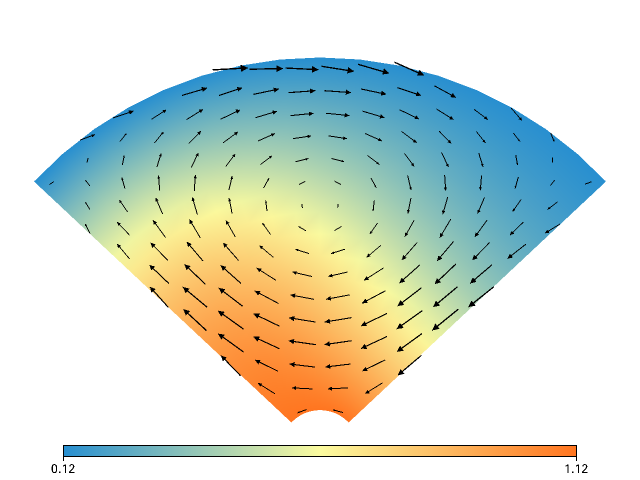

Reporting complete!


In [6]:
isovisc.report()

In [7]:
checkpointCondition = lambda: any([
    isovisc.status == 'pre-traverse',
    isovisc.status == 'post-traverse',
    ])
collectCondition = lambda: False
stopCondition = lambda: isovisc.step >= 100

In [8]:
isovisc.traverse(stopCondition, collectCondition, checkpointCondition)

In [9]:
isovisc.checkpoint()

Collecting...
Pre-existing directory for this model has been found. Continuing...
Checkpointing...
Checkpoint directory found: skipping.


Reporting...
avTemp 0.48
modeltime 0.0E+00
Nu 1.1
step 0
surfVRMS 443.31
VRMS 346.19
fig



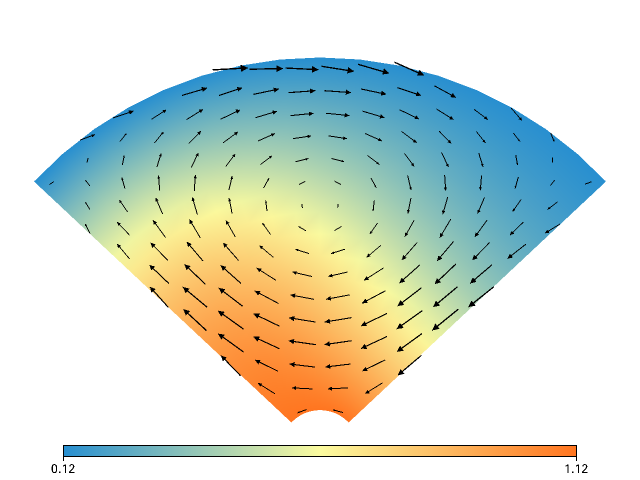

Reporting complete!


In [10]:
isovisc.report()

In [11]:
from modelscripts import MS98X_systemscript
from modelscripts import MS98X_observerscript

In [12]:
loadmodel = load_frame(isovisc.outputPath, isovisc.instanceID, loadStep = isovisc.step)

Initialising...
Initialisation complete!


In [13]:
initial = {
    'temperatureField': initials.load.IC(loadmodel, 'temperatureField'),
    'materialVar': initials.extents.IC((1, shapes.trapezoid(longwidth = 0.5, lengthRatio = 0.9)))
    }

Loading checkpoint...
Already at step  0  - aborting load_checkpoint.


In [14]:
MS98X = Frame(
    MS98X_systemscript.build(res = 64, heating = 0.),
    MS98X_observerscript.build(),
    initial = initial,
    outputPath = outputPath
    )

Collecting...
Analysing...
Analysis complete!
Initialising...
Mapping achieved at tolerance = 0.00256
Initialisation complete!


Reporting...
Analysing...
Analysis complete!
avTemp 0.56
avVisc 6.3E+03
modeltime 0.0E+00
Nu 1.2
step 0
surfVRMS 34.51
VRMS 152.44
yielding 7%
fig



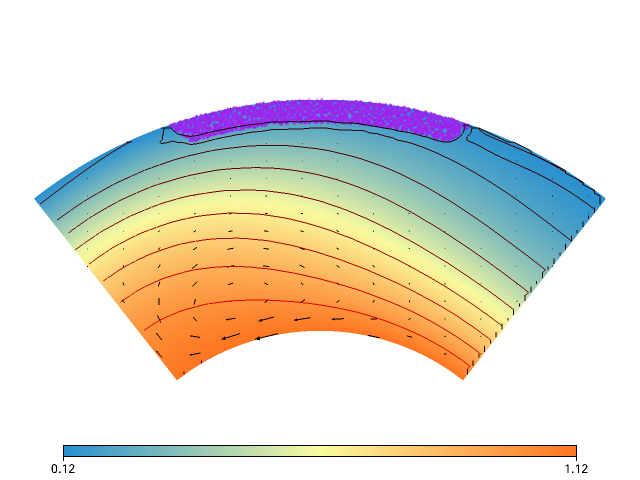

Reporting complete!


In [15]:
MS98X.report()

In [16]:
checkpointCondition = lambda: any([
    MS98X.status == 'pre-traverse',
    MS98X.step % 100 == 0,
    MS98X.status == 'post-traverse',
    ])
collectCondition = lambda: MS98X.step % 10 == 0
stopCondition = lambda: MS98X.step >= 100

In [17]:
MS98X.traverse(stopCondition, collectCondition, checkpointCondition)

Reporting...
avTemp 0.56
avVisc 6.3E+03
modeltime 0.0E+00
Nu 1.2
step 0
surfVRMS 34.51
VRMS 152.44
yielding 7%
fig



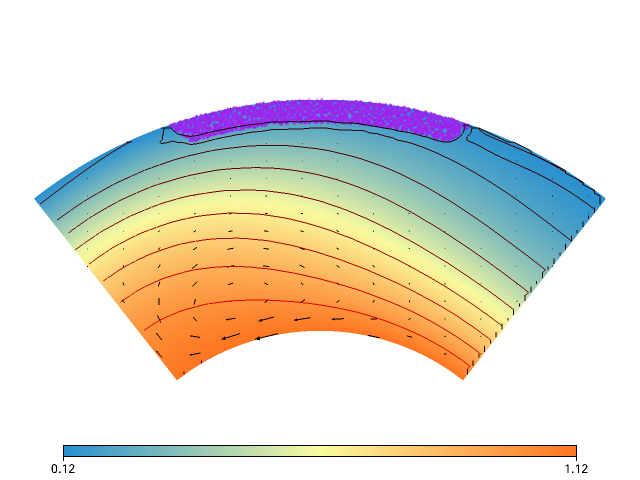

Reporting complete!


In [19]:
MS98X.report()